<a href="https://colab.research.google.com/github/Ashu156/2025_NBIO_207A/blob/main/demo/motionmapperpy_mouse_demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The github repositories for motionmapper are -

1. [MATLAB] **motionmapper** : https://github.com/gordonberman/MotionMapper

2. [PYTHON] **motionmapperpy** : https://github.com/bermanlabemory/motionmapperpy/


# 1.&nbsp; Downloading and installing motionmapperpy

First, we'll need to get motionmapperpy (sometimes we'll call it **mmpy** for brevity) from GitHub [image.png](https://github.com/bermanlabemory/motionmapperpy).

Below, we clone this github repository, which will download a copy of the repository on this COLAB runtime.

In [1]:
!git clone https://github.com/michaelhess17/motionmapperpy

Cloning into 'motionmapperpy'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 246 (delta 63), reused 40 (delta 40), pack-reused 165 (from 1)
Receiving objects: 100% (246/246), 113.16 MiB | 22.30 MiB/s, done.
Resolving deltas: 100% (124/124), done.


You'll notice the a **folder** named *motionmapperpy* created in the working directory in the left pane. This is the repository we just cloned and it contains the mmpy package and some toy datasets in the data folder. Note that our current working path is **/content/**, in case you ever get lost. We still need to install motionmapperpy as a python package and we can do that by running the commands in the cell below.

*Quick note* : Colab instances come with many Python packages pre installed. You can run ```%pip list``` to see what packages are already present.

*Another quick note* : We're installing a specific version of imageio below to avoid some dependency issues between ```moviepy``` and ```imageio``` that come preinstalled in colab. The up-to-date version packages seems to be behaving on my local machine so its likely colab.  

In [2]:
## Install mmpy in this cell

# Change to the motionmapperpy directory we just cloned into this colab instance
%cd motionmapperpy

# Install motionmapperpy as a python package to the current python environment
!python setup.py install

# Come out of the mmpy directory.
%cd ..

########################

# Installing imageio 2.4.1 for resolving issues with moviepy.
!pip3 install imageio==2.4.1


# Installing ipympl for plotting interactive widgets in this notebook.
!pip3 install ipympl

/content/motionmapperpy
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based t

\
\
\
Great! We should have `motionmapperpy` installed on this colab runtime now! We'll **need to restart the runtime** so that this notebook is able to recognize motionmapperpy (meaning we can do ```import motionmapperpy```)
and its dependencies as python packages. We can restart the instance by going to **Runtime->Restart Runtime** in the **top menu bar**. It is equivalent to restarting the ipython kernel when working with Jupyter notebooks.

Note that restarting the runtime does not delete files and folders we have created in this colab instance, or remove any python packages we've installed here. But doing **Disconnect and delete runtime** will do all of those things so be careful! Also, note that Google will clear our colab instance if we're not using the instance for some arbitrarily brief amount, in which case the runtime will be factory reset and we'll lose .


Once you have restarted the runtime, you are good to move on to the next section!
your_text_here

--------------------------------------------------------------------------
\
\
\
\
\
<font size="10">**Restart runtime before proceeding below!**</font>
\
\
\
\
\
Great! Lets now import all packages we'll use in this notebook, including motionmapperpy.

In [1]:
# Python standard library packages to do file/folder manipulations,
# pickle is a package to store python variables
import glob, os, pickle, sys

# time grabs current clock time and copy to safely make copies of large
# variables in memory.
import time, copy

# datetime package is used to get and manipulate date and time data
from datetime import datetime

# this packages helps load and save .mat files older than v7
import hdf5storage

# numpy works with arrays, pandas used to work with fancy numpy arrays
import numpy as np
import pandas as pd

# matplotlib is used to plot and animate to make movies
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# moviepy helps open the video files in Python
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Scikit-learn is a go-to library in Python for all things machine learning
from sklearn.decomposition import PCA

# tqdm helps create progress bars in for loops
from tqdm import tqdm

# Scipy is a go-to scientific computing library. We'll use it for median filtering.
from scipy.ndimage import median_filter

# Tensorflow and keras if we choose to do deep learning.
import tensorflow as tf
import tensorflow.keras as k

# Configuring matplotlib to show animations in a colab notebook as javascript
# objects for easier viewing.
from matplotlib import rc
rc('animation', html='jshtml')

from google.colab import output
output.enable_custom_widget_manager()
import ipywidgets

%matplotlib widget

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [2]:
import motionmapperpy as mmpy

# utility function used in this demo
from motionmapperpy import demoutils

# 2.&nbsp; Toy datasets

There are two small datasets present within the motionmapper repository that we just cloned from GitHub. These are present in **`motionmapperpy/data`** path.

1. **Mouse dataset** : **data/mice/** has 3 videos, each containing a mouse moving freely inside an arena for 5 mins (taken at 30hz). The **.npy** files in that folder are numpy arrays containing 18 tracked keypoints on the mouse in the corresponding videos.

3. **Leap tracked fly dataset** : This dataset has two movies **fly_leap_test.mp4** and **fly_leap_test_2.mp4** with 2 corresponding h5 files containing 32 points tracked using [LEAP](https://dataspace.princeton.edu/handle/88435/dsp01pz50gz79z).

You can download the mp4 files on your local computer and check out what they look like!



--------------------


Alright, lets get started! We'll focus on the Mouse dataset as our toy example in this notebook. We'll import some packages to kick things off below.

Now we can load the files associated with this dataset. We'll read the two video files using `moviepy` package, and the two .npy tracking datasets using numpy.

In [3]:
datasetnames = [d.split('/')[-1].split('.')[0] for d in glob.glob('motionmapperpy/data/mice/*.npy')]

print(datasetnames)

clips = [VideoFileClip('/content/motionmapperpy/data/mice/%s.mp4'%d) for d in datasetnames]
h5s = [np.load('/content/motionmapperpy/data/mice/%s.npy'%d) for d in datasetnames]

['OFT_F_19_0_9000', 'OFT_F_5_0_9000', 'OFT_F_8_0_9000']


Let's first explore some properties of the loaded movie clips and tracking data.

In [4]:
for i,(m,d) in enumerate(zip(clips, datasetnames)):
  print('%s is %i seconds long at %i fps. '
  'The frames are %i px wide and %i px high.'%(d, m.duration, m.fps, m.w, m.h))
print()
for i,h5 in enumerate(h5s):
  print('.npy file %i has shape %s.'%(i, h5.shape))

print('\n\nThere are %i tracked points on the mouse.'%h5s[0].shape[1])

OFT_F_19_0_9000 is 300 seconds long at 30 fps. The frames are 400 px wide and 400 px high.
OFT_F_5_0_9000 is 300 seconds long at 30 fps. The frames are 400 px wide and 400 px high.
OFT_F_8_0_9000 is 300 seconds long at 30 fps. The frames are 400 px wide and 400 px high.

.npy file 0 has shape (9000, 17, 2).
.npy file 1 has shape (9000, 17, 2).
.npy file 2 has shape (9000, 17, 2).


There are 17 tracked points on the mouse.


Lets plot the x positions of all keypoints from the first dataset below.

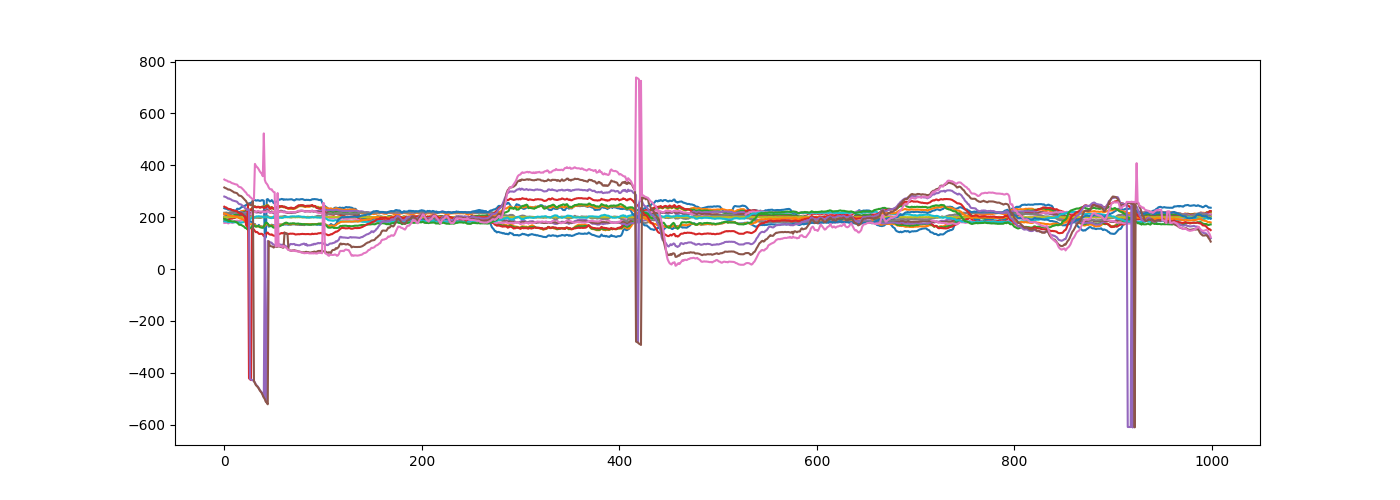

In [5]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(14,5))
_ = ax.plot(h5s[0][:1000,:,0]) #try 16th keypoint

Great! Now we are ready to plot and see what our dataset looks like. Below we'll use `matplotlib` to overlay tracking data on the video files. We'll read video frames using moviepy `videofileclip` objects stored in `clips`. Running this cell may take upto **1 minute**.



## Visualizing the data


Output()

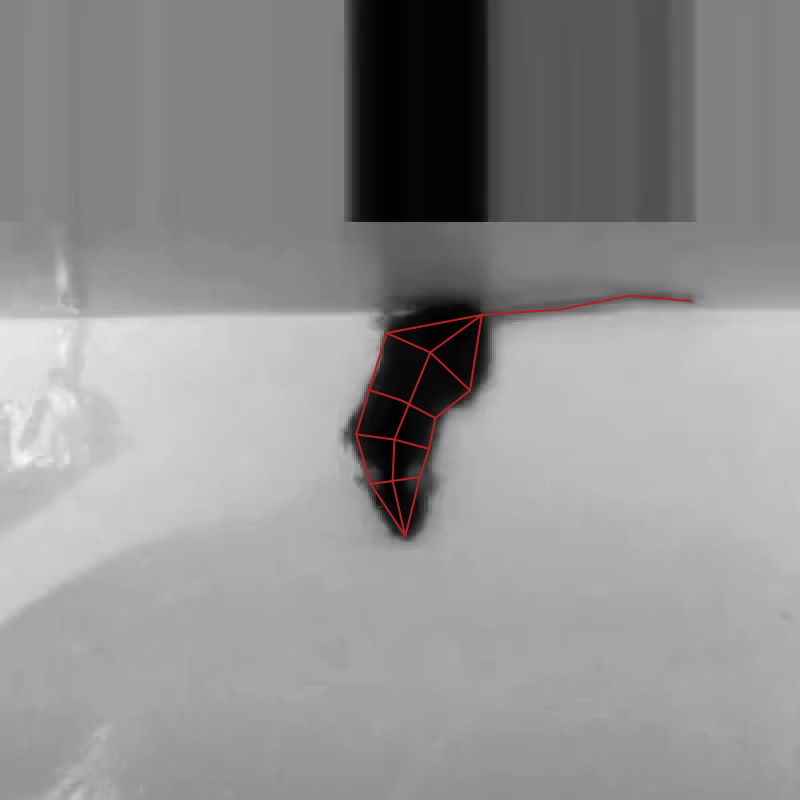

In [6]:
connections = [[0, 2, 5, 11, 13, 14, 15 ,16], [0, 1, 4, 7, 10, 13], [0, 3, 6, 9, 12, 13], [1, 2, 3], [4, 5, 6], [7, 8, 9],
                   [10, 11, 12]]


fig, ax = plt.subplots(figsize=(8,8))

fig.subplots_adjust(0,0,1,1,0,0)

def makeframe(dname, frameno):
    ax.clear()
    print('Making ', frameno,end='\r')
    frameno = int(min(frameno, clips[dname].duration*clips[dname].fps-1))
    ax.imshow(clips[dname].get_frame(frameno/clips[dname].fps))
    for conn in connections:
        ax.plot(h5s[dname][frameno,conn,0], h5s[dname][frameno,conn,1], color='firebrick')
    ax.axis('off')
    ax.set_title('%s, Frame %i'%(datasetnames[dname], frameno))
    print('',end='\r')



w = ipywidgets.FloatSlider
dd = ipywidgets.Dropdown
sliders = {'dname':dd(options=[(d,i) for i,d in enumerate(datasetnames)], index=0,layout=ipywidgets.Layout(width='1000px')),
        'frameno':w(value=0.0, min=0, max=len(h5s[0]), step=1, continuous_update=True, orientation='horizontal',
                    description='Frame No.',layout=ipywidgets.Layout(width='1000px'))}

i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.VBox([sliders['dname'], sliders['frameno']])

display(b, i)
plt.show()

# 3.&nbsp; Pre-processing the data

[![](http://www.accutrend.com/wp-content/uploads/2018/07/GiGo-570x315.jpg)](http://www.accutrend.com/it-still-comes-down-to-garbage-in-garbage-out/)

When working with any model, algorithm or pipeline, we have to be mindful of the data we are feeding into them. This section covers one (of many) ways to process input data before feeding into motionmapperpy.
I packed a few utility functions for this demo in the motionmapperpy repository submodule called ```demoutils``` (we imported it already) and we'll use them here and there.

## Egocentering

Great! Now we'll use a handy function to 'egocenter' our postural time series, such that the pose is centered at origin and is always pointing to the right. We can use the ```egoh5``` function to do that.

In [7]:
egoh5s = [demoutils.egoh5(h5) for h5 in h5s]

100%|██████████| 9000/9000 [00:00<00:00, 154390.93it/s]


Lets check what that did to our data.

Output()

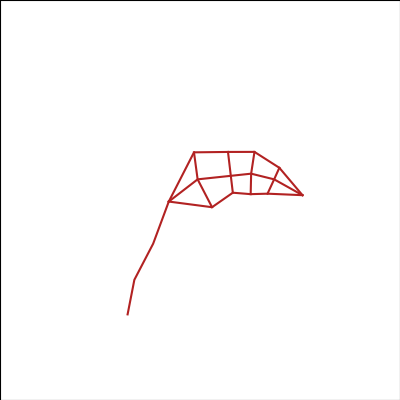

In [8]:
%matplotlib widget
connections2 = [[0, 3, 6, 8, 11, 12], [0, 2, 5, 10, 12], [0, 1, 4, 7, 9, 12],
                [1, 2, 3], [4, 5, 6], [7, 8], [9, 10, 11], [12,13,14,15]]


fig, ax = plt.subplots(figsize=(4,4))

fig.subplots_adjust(0,0,1,1,0,0)

def makeframe(dname, frameno):
    ax.clear()
    print('Making ', frameno,end='\r')
    frameno = int(min(frameno, clips[dname].duration*clips[dname].fps-1))
    for conn in connections2:
        ax.plot(egoh5s[dname][frameno,conn,0], egoh5s[dname][frameno,conn,1], color='firebrick')
    # ax.axis('off')
    ax.set_title('%s, Frame %i'%(datasetnames[dname], frameno))
    ax.set_xlim([-200,150])
    ax.set_ylim([-200,150])
    ax.set_aspect('equal')
    print('',end='\r')



w = ipywidgets.FloatSlider
dd = ipywidgets.Dropdown
sliders = {'dname':dd(options=[(d,i) for i,d in enumerate(datasetnames)], index=0,layout=ipywidgets.Layout(width='1000px')),
        'frameno':w(value=0.0, min=0, max=len(h5s[0]), step=1, continuous_update=True, orientation='horizontal',
                    description='Frame No.',layout=ipywidgets.Layout(width='1000px'))}

i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.VBox([sliders['dname'], sliders['frameno']])

display(b, i)
plt.show()

## Rescaling
Great! Now, since we're measuring postural dynamics from multiple
animals, varying body sizes across individuals can contribue a lot of noisy dynamics and mess up our quantification. So, lets first check the median nose-to-tail length of each of the mice and then normalize them

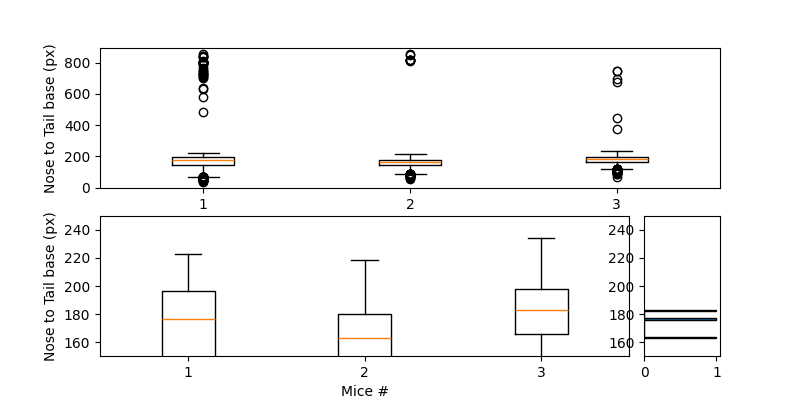

In [9]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(ncols=7, nrows=2)

ax = fig.add_subplot(spec[0,:])
ax.boxplot([np.linalg.norm(eh5[:,14]-eh5[:,0], axis=1) for eh5 in egoh5s])
ax.set_xlabel('Mice #')
ax.set_ylabel('Nose to Tail base (px)')

ax = fig.add_subplot(spec[1, :-1])
ax.boxplot([np.linalg.norm(eh5[:,14]-eh5[:,0], axis=1) for eh5 in egoh5s])
ax.set_xlabel('Mice #')
ax.set_ylabel('Nose to Tail base (px)')
ax.set_ylim([150,250])

ax = fig.add_subplot(spec[1,-1])
ax.hist([np.median(np.linalg.norm(eh5[:,14]-eh5[:,0], axis=1)) for eh5 in egoh5s], orientation='horizontal', bins=20, fc="None", edgecolor='black')
ax.set_ylim([150,250])
plt.show()

In [10]:
#normalize postural timeseries across individuals

mice_lengths = np.array([np.median(np.linalg.norm(eh5[:,14]-eh5[:,0], axis=1)) for eh5 in egoh5s])
mice_lengths_normed = mice_lengths/np.max(mice_lengths)
assert np.all(np.isfinite(mice_lengths_normed))

egoh5s_noconf_scaled = [eh5/scale for eh5,scale in zip(egoh5s, mice_lengths_normed)]
alleh5s = np.concatenate(egoh5s_noconf_scaled, axis=0)

## AutoEncoder Model

We'll train an AutoEncoder model to reduce the dimensionality of the data (we hav 32 dimensions right now, 16 keypoints in 2D).

Lets create the train and validation datasets for training the model.

In [11]:
clean_alleh5s = alleh5s[np.where(~np.any(np.any(np.abs(alleh5s)>200, axis=2), axis=1))[0]]

trainx = clean_alleh5s[5::5, :].reshape((-1, 32)).astype('float32')[:,:]
valx = clean_alleh5s[7::19, :].reshape((-1, 32)).astype('float32')[:,:]
print(trainx.shape, valx.shape)
print(trainx.min(), trainx.max())
print(valx.min(), valx.max())

(5291, 32) (1393, 32)
-199.85107 198.62816
-199.5869 155.2408


Lets now define and train the model!

In [12]:
ident = 'RescaledMice_8latents'

### Training

In [13]:
AE = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(32,)),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation=None),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation=None)])
AE.compile('adam', 'mse')
trainhist = AE.fit(trainx, trainx, batch_size=64, epochs=200, validation_data=(valx, valx),
              callbacks = [tf.keras.callbacks.ModelCheckpoint('%s.keras'%ident,
                                                              monitor="val_loss",
                                                              verbose=1,
                                                              save_best_only=True)])
pickle.dump(trainhist, open('%s.hist'%ident, 'wb'))
AE_best = k.models.load_model('%s.keras'%ident)

  warnings.warn(



Epoch 1/200
78/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2730.9817
Epoch 1: val_loss improved from inf to 882.99164, saving model to RescaledMice_8latents.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2677.3354 - val_loss: 882.9916
Epoch 2/200
67/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 620.3813
Epoch 2: val_loss improved from 882.99164 to 143.67308, saving model to RescaledMice_8latents.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 574.6926 - val_loss: 143.6731
Epoch 3/200
76/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121.2423
Epoch 3: val_loss improved from 143.67308 to 61.93573, saving model to RescaledMice_8latents.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.8984 - val_loss: 61.9357
Epoch 4/200
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9029
Epoch 4: val_loss improved from 61.93573 to 46.35621, saving model to RescaledMice_8latents.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.8225 - val_loss: 46.3562
Epoch 5/200
70/83 ━━━━━━━━━━━━━

We can look at the loss curves below.

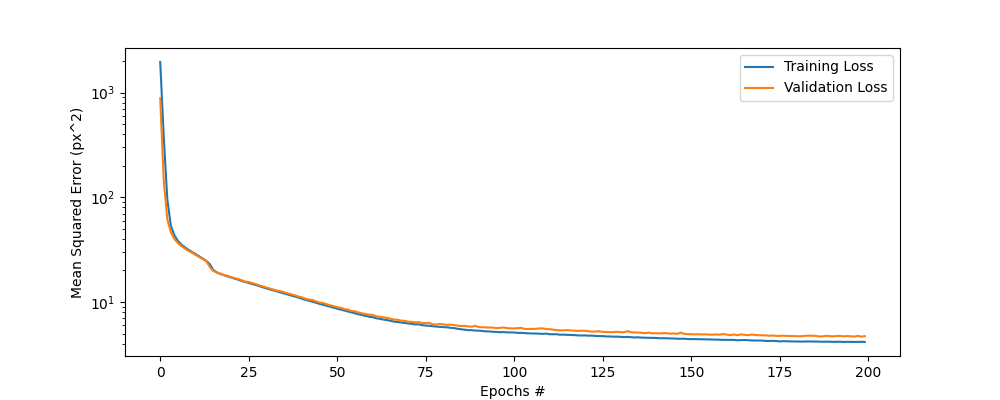

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(trainhist.history['loss'], label='Training Loss')
ax.plot(trainhist.history['val_loss'], label='Validation Loss')
ax.set_yscale('log')
ax.set_ylabel('Mean Squared Error (px^2)')
ax.set_xlabel('Epochs #')
ax.legend()


### Validation Errors

We can also look at the predictions on the validation data, and plot the predictions with highest errors.

In [15]:
# get validation set predictions

valx_pred = AE_best.predict(valx, verbose=1)
assert np.all(np.mean(np.abs(valx-valx_pred), axis=1)>0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Output()

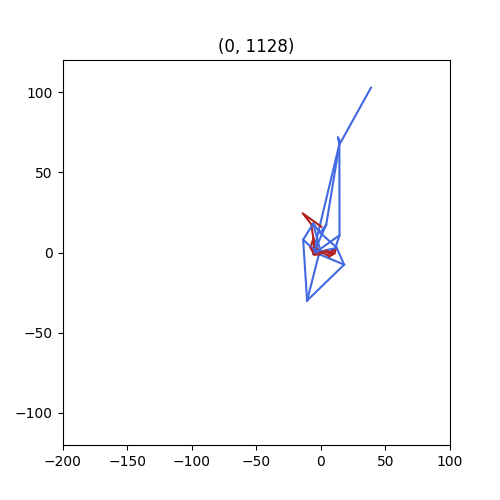

In [16]:
connections2 = [[0, 3, 6, 8, 11, 12], [0, 2, 5, 10, 12,13,14,15], [0, 1, 4, 7, 9, 12],
                [1, 2, 3], [4, 5, 6], [7, 8], [9, 10, 11], [12,13,14,15]]

badvalinds = np.argsort(np.mean(np.abs(valx-valx_pred), axis=1))[::-1]


fig, ax = plt.subplots(figsize=(5,5))

# fig.subplots_adjust(0,0,1,1,0,0)

def makeframe(tin):
    skip=1
    ax.clear()
    lines = []
    t = badvalinds[tin]
    # print(t, tin)
    for conn in connections2[:-1]:
        conn = [2*i for i in conn]
        lines.append(ax.plot(valx[t*skip, conn], valx[t*skip, [i+1 for i in conn]], color='royalblue')[0])
        lines.append(ax.plot(valx_pred[t*skip, conn], valx_pred[t*skip, [i+1 for i in conn]], color='firebrick')[0])
    ax.set_title('(%i, %i)'%((tin, t)))
#     ax.set_aspect('equal')
    ax.set_xlim([-200, 100])
    ax.set_ylim([-120,120])



i = ipywidgets.IntSlider
sliders = {'tin':i(value=0, min=0, max=50, step=1, #len(badvalinds)-1
                   continuous_update=False, orientation='horizontal',
                    description='Frame No.',layout=ipywidgets.Layout(width='1000px'))}

i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.VBox([sliders['tin']])

display(b, i)
plt.show()

We can quantify mean errors in pixels along the x and y dimensions below.

In [17]:
errors = np.abs(valx_pred-valx).reshape((-1, valx.shape[1]//2, 2))
np.mean(errors, axis=(0,1))

array([1.5748765, 1.4260409], dtype=float32)

We'll use the 8-dimensional bottleneck layer values as the input for motionmapperpy. We get these values below.

In [18]:
AE2 = k.models.Model(inputs=AE_best.inputs, outputs=AE_best.layers[1].output)

#check if the weights are same
assert np.all([np.all(w1==w2) for w1,w2 in zip(AE_best.get_weights(),AE2.get_weights())])

print(alleh5s.shape)

alleh5s_ae = AE2.predict(alleh5s[:,:].reshape((-1, 32)).astype('float32'), verbose=1)
print(alleh5s_ae.shape)

(27000, 16, 2)
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(27000, 8)


# 4.&nbsp; Creating an mmpy project directory

Now that we have a low dimensional time series which **may** not set Google servers on fire, we will create our project directory for running the `motionmapperpy` pipeline on the data we have. Having a project directory is awesome, as it helps us stay organized when working with big datasets and multiple files. It allows datasets to be easily referenced and loaded without exhausting memory, and we can store pipeline outputs in well-defined and easy to read files.


Lets start by importing `motionmapperpy` and creating a project directory.

In [19]:
import motionmapperpy as mmpy


projectPath = '/content/Mice_mmpy'

# This creates a project directory structure which will be used to store all motionmappery pipeline
# related data in one place.

mmpy.createProjectDirectory(projectPath)


Creating : /content/Mice_mmpy
Creating : /content/Mice_mmpy/Projections
Creating : /content/Mice_mmpy/TSNE_Projections
Creating : /content/Mice_mmpy/TSNE
Creating : /content/Mice_mmpy/UMAP


Now lets store the two low-d time series to the *`Projections`* folder that got created in the cell above.

Note the _pcaModes.mat identifier when saving these files.  



In [20]:
projs_list = np.split(alleh5s_ae, np.cumsum([len(e) for e in egoh5s])[:-1])

for i,projs in enumerate(projs_list):
    hdf5storage.savemat('%s/Projections/%s_pcaModes.mat'%(projectPath, datasetnames[i]), {'projections':projs})


We'll now go through `mmpy` parameters. They are a handful and can be overwhelming, but they are very interpretable!

Parameters are cruicial to `mmpy` as they lay out some hard-coded choices *we need to make* when running this pipeline. I will explain each parameter as we encounter them in the cell below, so please read through this cell below as you run it.


In [21]:
"""2. Setup run parameters for MotionMapper."""

#% Load the default parameters.
parameters = mmpy.setRunParameters()


In [22]:

# %%%%%%% PARAMETERS TO CHANGE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# These need to be revised everytime you are working with a new dataset. #

parameters.projectPath = projectPath #% Full path to the project directory.


parameters.method = 'UMAP' #% We can choose between 'TSNE' or 'UMAP'

parameters.minF = 1        #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 15       #% Maximum frequency for Morlet Wavelet Transform,
                           #% usually equals to the Nyquist frequency for your
                           #% measurements.

parameters.samplingFreq = 30    #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 30       #% No. of dyadically spaced frequencies to
                                 #% calculate between minF and maxF.

parameters.pcaModes = 8 #% Number of low-d features.

parameters.numProcessors = -1     #% No. of processor to use when parallel
                                 #% processing for wavelet calculation (if not using GPU)
                                 #% and for re-embedding. -1 to use all cores
                                 #% available.

parameters.useGPU = -1           #% GPU to use for wavelet calculation,
                                 #% set to -1 if GPU not present.

parameters.training_numPoints = 3000    #% Number of points in mini-trainings.


# %%%%% NO NEED TO CHANGE THESE UNLESS MEMORY ERRORS OCCUR %%%%%%%%%%

parameters.trainingSetSize = 5000  #% Total number of training set points to find.
                                 #% Increase or decrease based on
                                 #% available RAM. For reference, 36k is a
                                 #% good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when
                                        #% re-embedding points on a learned map.

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Above covers usually relevant parameters when using `mmpy`. However, there are parameters associated with tSNE and UMAP implementations, such as below, which aren't usually required to be changed.

In [23]:
# %%%%%%% tSNE parameters %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#% can be 'barnes_hut' or 'exact'. We'll use barnes_hut for this tutorial for speed.
parameters.tSNE_method = 'barnes_hut'

# %2^H (H is the transition entropy)
parameters.perplexity = 32

# %number of neigbors to use when re-embedding
parameters.maxNeighbors = 200

# %local neighborhood definition in training set creation
parameters.kdNeighbors = 5

# %t-SNE training set perplexity
parameters.training_perplexity = 20


# %%%%%%%% UMAP Parameters %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Size of local neighborhood for UMAP.
n_neighbors = 15

# Negative sample rate while training.
train_negative_sample_rate = 5

# Negative sample rate while embedding new data.
embed_negative_sample_rate = 1

# Minimum distance between neighbors.
min_dist = 0.1


## Visualizing wavelet amplitudes

This section is not required to be run by motionmapperpy, but we'll go through it to visualize spectrograms on one of the low-dimensional time series.

We'll use `mmpy.findWavelets` function to obtain the waveletes, and plot the obtained spectrogram for each feature/projection.

	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.36 seconds.


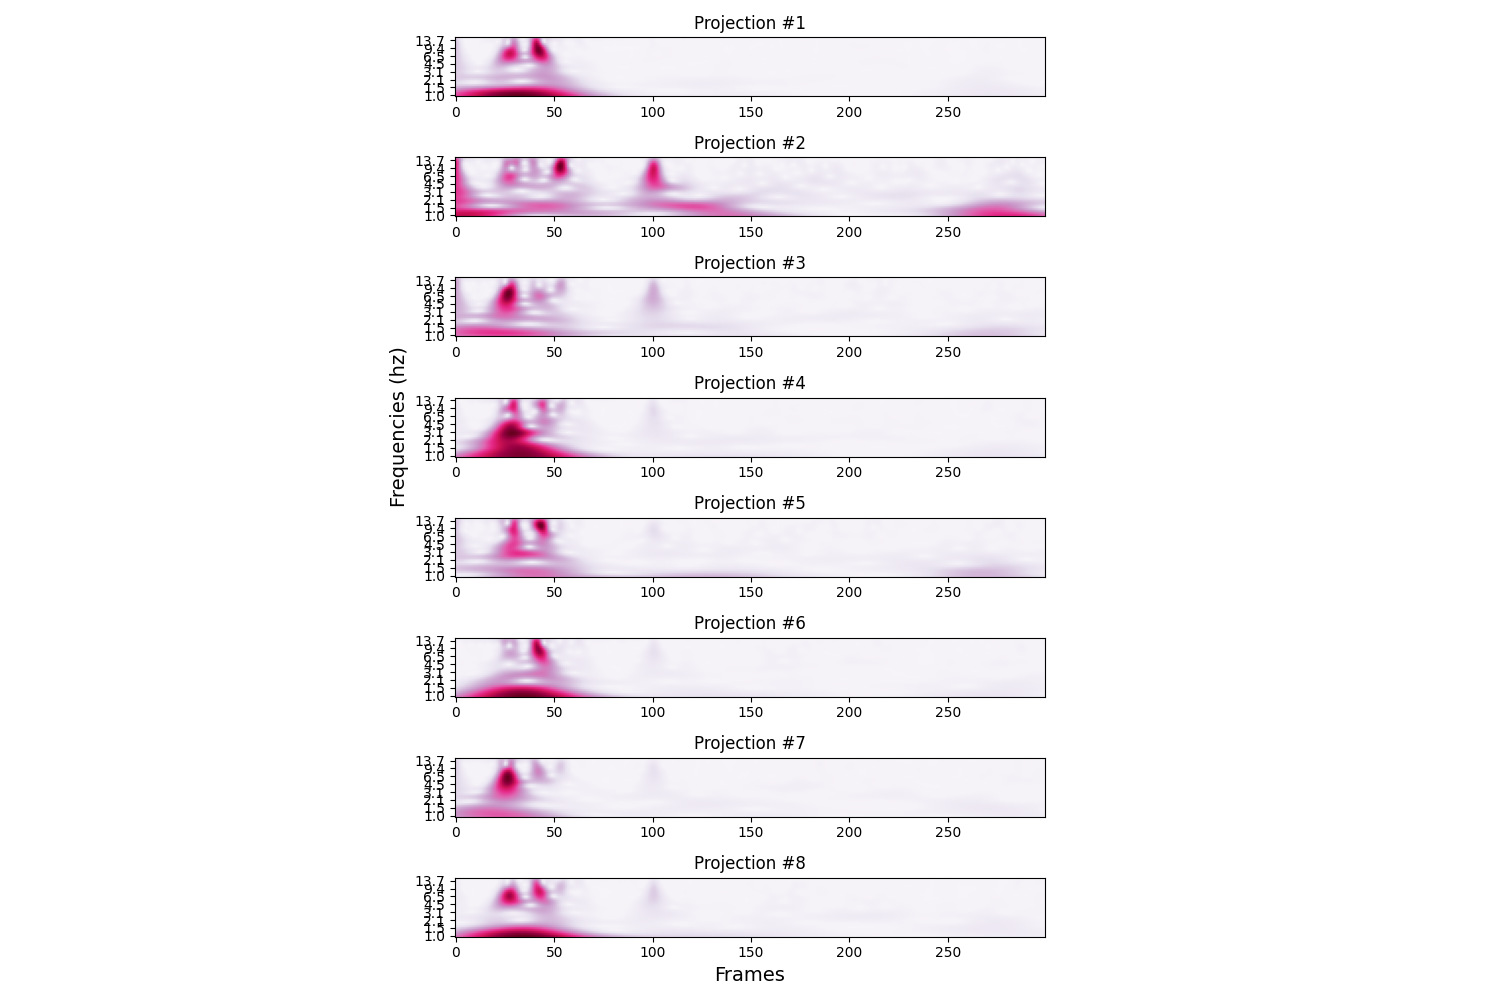

In [24]:
wlets, freqs = mmpy.findWavelets(projs_list[0], projs_list[0].shape[1],
                                 parameters.omega0, parameters.numPeriods,
                                 parameters.samplingFreq, parameters.maxF,
                                 parameters.minF, parameters.numProcessors,
                                 parameters.useGPU)

fig, axes = plt.subplots(alleh5s_ae.shape[1], 1, figsize=(15,10))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(wlets[:300,parameters.numPeriods*i:parameters.numPeriods*(i+1)].T, cmap='PuRd', origin='lower')
  ax.set_yticks(np.arange(parameters.numPeriods, step=4))
  ax.set_yticklabels(['%0.1f'%freqs[j] for j in np.arange(parameters.numPeriods, step=4)])
  if i == 3:
    ax.set_ylabel("Frequencies (hz)", fontsize=14)
  ax.set_title('Projection #%i'%(i+1))
ax.set_xlabel('Frames', fontsize=14)
plt.tight_layout()

As we can see, our low-d time series is soon dwarfed by the 25-dimensional wavelet amplitudes obtained for each low-d feature! This is why its wise to spend some time reducing the dimensionality of our original data, as much as we can.


# 5.&nbsp; Creating a training set and embedding it using tSNE/UMAP

Even though we are working with toy datasets, we have two extremely high dimensional timeseries we're using to create a smaller and more interpretable representation. tSNE and UMAP both need to compute all-to-all distances in high-dimensional space to find neighboring points and embed them closely on this low-dimensional space we're building. This computation can quickly exhaust memory (ram) and it scales quadratically with # of datapoints.

To navigate this challenge, we do a subsampling procedure to create a training set, and use tSNE or UMAP to create training embeddings. All of this is done in the cell below.

**Time taken** : TSNE ~2 mins | UMAP ~1 min


In [25]:
t1 = time.time()

mmpy.subsampled_tsne_from_projections(parameters, parameters.projectPath)

print('Done in %i seconds.'%(time.time()-t1))


Finding Training Set
Finding training set contributions from data set 1/3 : 
/content/Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.49 seconds.
Finding Templates.
Finding training set contributions from data set 2/3 : 
/content/Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.62 seconds.
Finding Templates.
Finding training set contributions from data set 3/3 : 
/content/Mice_mmpy/Projections/OFT_F_5_0_9000_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.35 seconds.
Finding Templates.
Finding UMAP Embedding for Training Set
Saving UMAP model to disk...
Done in 114 seconds.


Note that the `training set` and `training embedding` are both save in the `project_directory/TSNE` or `project_directory/UMAP` directories depending on which method you're using. We'll load the training embedding below and plot it. You can play around with the sigma value here to change the coarseness of the density map.

## Visualizing training set embeddings.

Output()

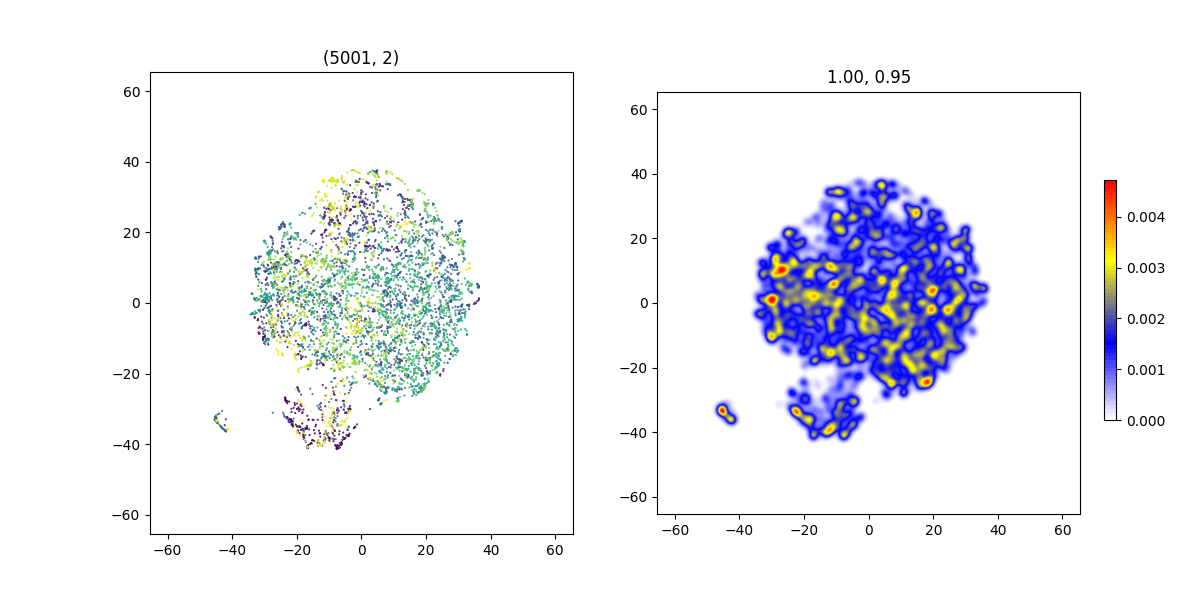

In [26]:
%matplotlib widget

trainy = hdf5storage.loadmat('%s/%s/training_embedding.mat'%(parameters.projectPath, parameters.method))['trainingEmbedding']
m = np.abs(trainy).max()


fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(trainy[:,0], trainy[:,1], marker='.', c=np.arange(trainy.shape[0]), s=1)
axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])
axes[0].set_title(trainy.shape)


cbar_ax = fig.add_axes([0.92, 0.3, 0.01, 0.4])


def makeframe(sigma, c_limit):
    ax = axes[1]
    ax.clear()
    _, xx, density = mmpy.findPointDensity(trainy, sigma, 511, [-m-20, m+20])
    im = ax.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]),
              origin='lower', vmax=np.max(density)*c_limit)
    # ax.axis('off')
    ax.set_title('%0.02f, %0.02f'%(sigma, c_limit))
    cbar_ax.clear()
    fig.colorbar(im, cax=cbar_ax, fraction=c_limit)


w = ipywidgets.FloatSlider
sliders = {'sigma':w(value=1.0, min=0.1, max=3.0, step=0.05, continuous_update=False,
                     orientation='horizontal',
                     description='sigma', layout=ipywidgets.Layout(width='1000px')),
        'c_limit':w(value=0.95, min=0.1, max=1.0, step=0.05, continuous_update=False,
                    orientation='horizontal',
                    description='C Limit',layout=ipywidgets.Layout(width='1000px'))}

i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.VBox([sliders['sigma'], sliders['c_limit']])

display(b, i)
plt.show()

On the left, we see a scatter plot and on the right, we see a Gaussian kernel convolved density estimation of these points. Does it surprise you? What does changing the sigma value do?  


# 6.&nbsp; Finding embeddings for all data

Now, we can find embeddings for our entire dataset! We'll use the `mmpy.findEmbeddings` function which requires the training set and the 2-d embeddings we find in the last step, and the high-d 'projections' time series for each dataset. We'll save the obtained embeddings for each dataset neatly in the Projections folder so that we can reference them later.

**Running time** : TSNE ~12 mins | UMAP ~1 min

In [27]:
tall = time.time()

import h5py
tfolder = parameters.projectPath+'/%s/'%parameters.method

# Loading training data
with h5py.File(tfolder + 'training_data.mat', 'r') as hfile:
    trainingSetData = hfile['trainingSetData'][:].T

# Loading training embedding
with h5py.File(tfolder+ 'training_embedding.mat', 'r') as hfile:
    trainingEmbedding= hfile['trainingEmbedding'][:].T

if parameters.method == 'TSNE':
    zValstr = 'zVals'
else:
    zValstr = 'uVals'

projectionFiles = glob.glob(parameters.projectPath+'/Projections/*pcaModes.mat')
for i in range(len(projectionFiles)):
    print('Finding Embeddings')
    t1 = time.time()
    print('%i/%i : %s'%(i+1,len(projectionFiles), projectionFiles[i]))


    # Skip if embeddings already found.
    if os.path.exists(projectionFiles[i][:-4] +'_%s.mat'%(zValstr)):
        print('Already done. Skipping.\n')
        continue

    # load projections for a dataset
    projections = hdf5storage.loadmat(projectionFiles[i])['projections']

    # Find Embeddings
    zValues, outputStatistics = mmpy.findEmbeddings(projections,trainingSetData,trainingEmbedding,parameters)

    # Save embeddings
    hdf5storage.write(data = {'zValues':zValues}, path = '/', truncate_existing = True,
                    filename = projectionFiles[i][:-4]+'_%s.mat'%(zValstr), store_python_metadata = False,
                      matlab_compatible = True)

    # Save output statistics
    with open(projectionFiles[i][:-4] + '_%s_outputStatistics.pkl'%(zValstr), 'wb') as hfile:
        pickle.dump(outputStatistics, hfile)

    del zValues,projections,outputStatistics

print('All Embeddings Saved in %i seconds!'%(time.time()-tall))


Finding Embeddings
1/3 : /content/Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.35 seconds.
Finding Embeddings
	Loading UMAP Model.
	Loaded.
Embeddings found in 7.07 seconds.
Finding Embeddings
2/3 : /content/Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.38 seconds.
Finding Embeddings
	Loading UMAP Model.
	Loaded.
Embeddings found in 5.44 seconds.
Finding Embeddings
3/3 : /content/Mice_mmpy/Projections/OFT_F_5_0_9000_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #2 CPUs.
	 Done at 0.35 seconds.
Finding Embeddings
	Loading UMAP Model.
	Loaded.
Embeddings found in 6.04 seconds.
All Embeddings Saved in 19 seconds!


## Visualizing all embeddings

We can visualize the obtained embeddings by calling the cell below.

Output()

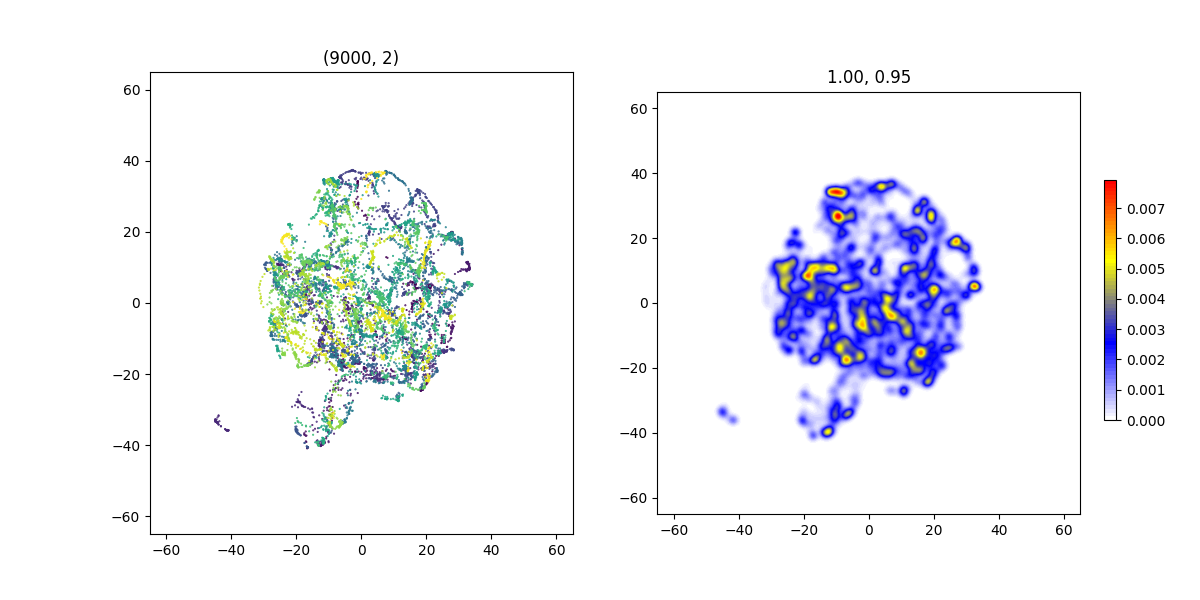

In [28]:
# load all the embeddings
%matplotlib widget
for i in glob.glob(parameters.projectPath+'/Projections/*_%s.mat'%(zValstr)):
  ally = hdf5storage.loadmat(i)['zValues']

m = np.abs(ally).max()

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(ally[:,0], ally[:,1], marker='.', c=np.arange(ally.shape[0]), s=1)
axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])
axes[0].set_title(ally.shape)

cbar_ax = fig.add_axes([0.92, 0.3, 0.01, 0.4])


def makeframe(sigma, c_limit):
    ax = axes[1]
    ax.clear()
    _, xx, density = mmpy.findPointDensity(ally, sigma, 511, [-m-20, m+20])
    im = ax.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]),
              origin='lower', vmax=np.max(density)*c_limit)
    # ax.axis('off')
    ax.set_title('%0.02f, %0.02f'%(sigma, c_limit))
    cbar_ax.clear()
    fig.colorbar(im, cax=cbar_ax, fraction=c_limit)


w = ipywidgets.FloatSlider
sliders = {'sigma':w(value=1.0, min=0.1, max=3.0, step=0.05, continuous_update=False,
                     orientation='horizontal',
                     description='sigma', layout=ipywidgets.Layout(width='1000px')),
        'c_limit':w(value=0.95, min=0.1, max=1.0, step=0.05, continuous_update=False,
                    orientation='horizontal',
                    description='C Limit',layout=ipywidgets.Layout(width='1000px'))}

i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.VBox([sliders['sigma'], sliders['c_limit']])

display(b, i)
plt.show()

# 7.&nbsp; Watershed transform on the density map

There is another handy function in `motionmapperpy` called `findWatershedRegions`. This will do an iterative watershed transform on the behavioral density map **until the given # of `minimum_regions` are found** in the density map.

It saves watershed transformed output of the embedding in `project_director/UMAP/zVals_wShed_groups.mat` file.


1/3 Loading embedding for OFT_F_19_0_9000_pcaModes 0.00 seconds.
2/3 Loading embedding for OFT_F_8_0_9000_pcaModes 0.01 seconds.
3/3 Loading embedding for OFT_F_5_0_9000_pcaModes 0.01 seconds.
Starting watershed transform...
Assigning watershed regions...
	 tempsave done.
All data saved in UMAP/zVals_wShed_groups.mat.


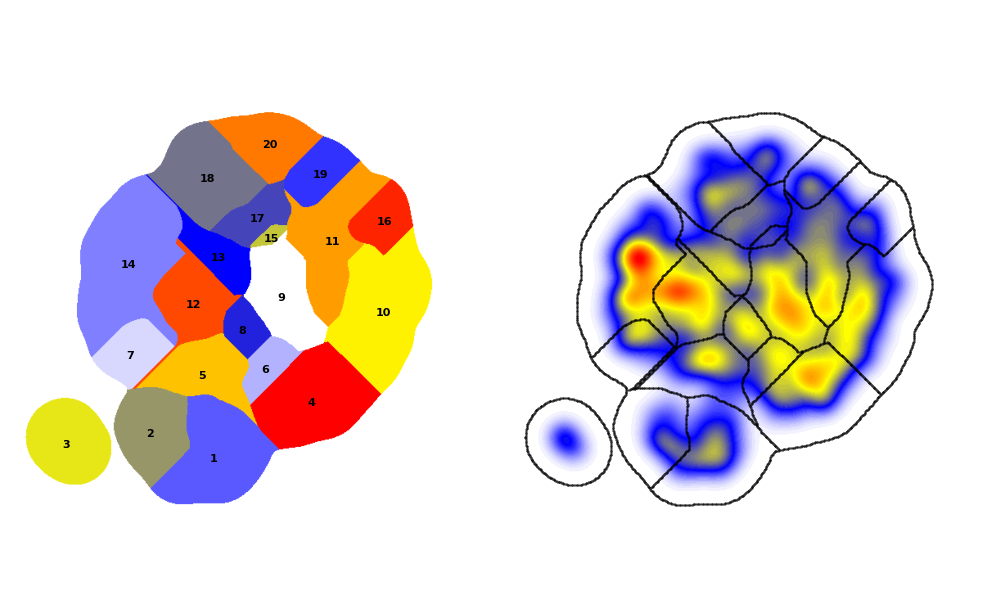

In [29]:
# decrease the startsigma values by 0.5 at a time if you get errors.
startsigma = 3 if parameters.method == 'TSNE' else 1.0

[os.remove(i) for i in glob.glob('%s/%s/zWshed*.png'%(parameters.projectPath, parameters.method))]

mmpy.findWatershedRegions(parameters, minimum_regions=20, startsigma=startsigma, pThreshold=[0.33, 0.67],
                     saveplot=True, endident = '*_pcaModes.mat')

from IPython.display import Image
Image(glob.glob('%s/%s/zWshed*.png'%(parameters.projectPath, parameters.method))[0])

## zVals_wShed_groups.mat file

The **UMAP/zVals_wShed_groups.mat** or **TSNE/zVals_wShed_groups.mat** contains all important outputs from the motionmapperpy pipeline. Lets look at some of the important variables in it.

In [30]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))
print('Loaded %s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))

print(type(wshedfile))
print(list(wshedfile.keys()))

Loaded /content/Mice_mmpy/UMAP/zVals_wShed_groups.mat
<class 'dict'>
['LL', 'density', 'groups', 'pRest', 'sigma', 'v', 'watershedRegions', 'wbounds', 'xx', 'zValLens', 'zValNames', 'zValues']


In [31]:
print('wshedfile[\'zValues\'] contains the 2-d tsne/umap coordinates for all the datasets, concatenated.',
      wshedfile['zValues'].shape)
print('\nwshedfile[\'watershedRegions\'] contains the watershed region assignment for all the datasets, concatenated.',
      wshedfile['watershedRegions'].shape)
print('\nwshedfile[\'zValLens\'] contains the length of all datasets : ',
      wshedfile['zValLens'], '\n in the order they are in wshedfile[\'zValNames\'] : ', [z[0][0] for z in wshedfile['zValNames'][0]], end='\n\n')
print('We can use these two to cross reference zValues and watersherRegions values to the original datasets.')

wshedfile['zValues'] contains the 2-d tsne/umap coordinates for all the datasets, concatenated. (27000, 2)

wshedfile['watershedRegions'] contains the watershed region assignment for all the datasets, concatenated. (1, 27000)

wshedfile['zValLens'] contains the length of all datasets :  [[9000 9000 9000]] 
 in the order they are in wshedfile['zValNames'] :  [np.str_('OFT_F_19_0_9000_pcaModes'), np.str_('OFT_F_8_0_9000_pcaModes'), np.str_('OFT_F_5_0_9000_pcaModes')]

We can use these two to cross reference zValues and watersherRegions values to the original datasets.


# 8.&nbsp; Stereotypy in Behavior

It is very important to know when are we capturing a stereotypic behavioral bout. There are two criteria we can use to decied that -

**1. Velocity in the 2-d space**

If we look at the velocity of trajectory within the 2-dimensional embeddings, we see a bimodal distribution, in which the lower velocity peak corresponds to local movement and the higher velocity peak corresponding to jumping back and forth between far away peaks.

Lets create and see this distribution below.

**Note : This only work with TSNE and not UMAP. Can we guess why?**

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.


Text(0, 0.5, 'PDF')

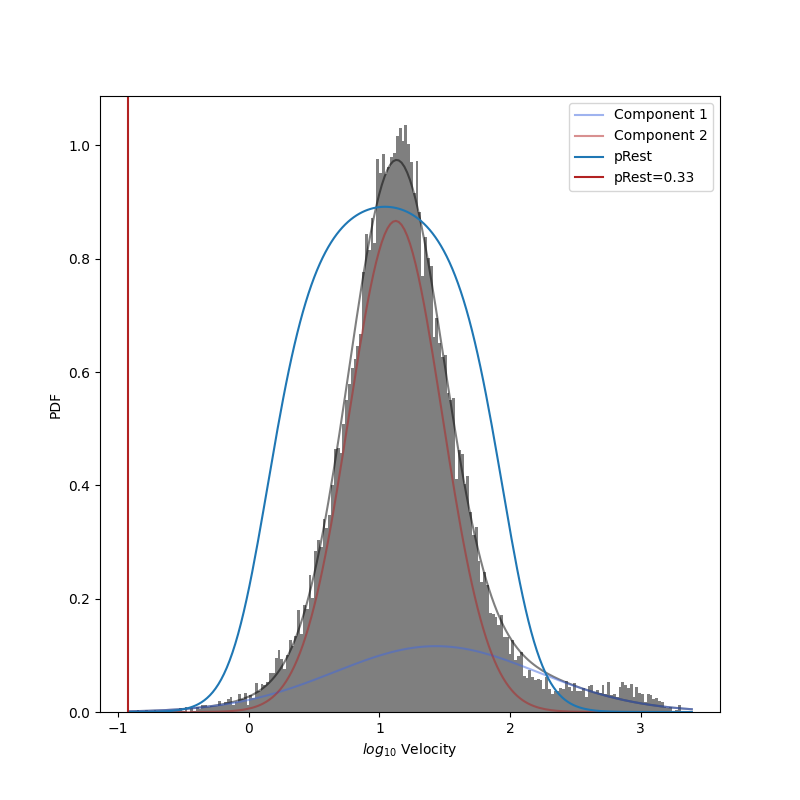

In [32]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))
ampV = wshedfile['v']
ampVels = ampV * parameters['samplingFreq']
vellog10all = np.log10(ampVels[ampVels > 0])
npoints = min(50000, len(vellog10all))

vellog10 = np.random.choice(vellog10all, size=npoints, replace=False)

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, verbose=1, tol=1e-5, max_iter=2000, n_init=1, reg_covar=1e-3)
inds = np.random.randint(0, vellog10.shape[0], size=npoints)
gm = gm.fit(vellog10[inds, None])
minind = np.argmin(gm.means_.squeeze())


fig, ax = plt.subplots(figsize=(8, 8))
bins = ax.hist(vellog10, bins=200, density=True, color='k', alpha=0.5)
bins = bins[1]
p_score = np.exp(gm.score_samples(bins[:, None]))
ax.plot(bins, p_score, color='k', alpha=0.5)

for (c, compno, mu, sigma, p) in \
        zip(['royalblue', 'firebrick'], [1, 2], gm.means_.squeeze(), np.sqrt(gm.covariances_.squeeze()),
            gm.weights_):
    ax.plot(bins, mmpy.mmutils.getPDF(bins, mu, sigma, p), label='Component %i' % compno, color=c, alpha=0.5)

ax.plot(bins, gm.predict_proba(bins[:, None])[:, minind], label='pRest')
ax.axvline(bins[np.where(gm.predict_proba(bins[:, None])[:, minind] < np.min(parameters.pThreshold))[0][0]], color='firebrick',
            label='pRest=%0.2f'%np.min(parameters.pThreshold))
ax.legend()
ax.set_xlabel(r'$log_{10}$ Velocity')
ax.set_ylabel('PDF')


**2. Watershed Region occupancy**

We can also look at the timeseries over watershed regions and discard timepoints where the occupancy (bout) time at each instance is longer than a threshhold. This is already done within the ```findWatershedRegions``` function we used to obtain a watershed segmentation. I hardcoded the threshold to 2 within that function and is not contained in the parameters dict.
(*this is partly because Gordon didn't pay me enough to do software development AND science, and partly because I am not a software developer!*)

But we can always impose this post-hoc, and it is quite important to do it!





# 9.&nbsp; Preliminary Analyses

Lets load the wshedfile.

In [33]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))

## Ethograms

We can now create ethograms using the watershed region time series created in the last step.

(9000, 21)
(9000, 21)


Text(0.5, 0, 'Time (min)')

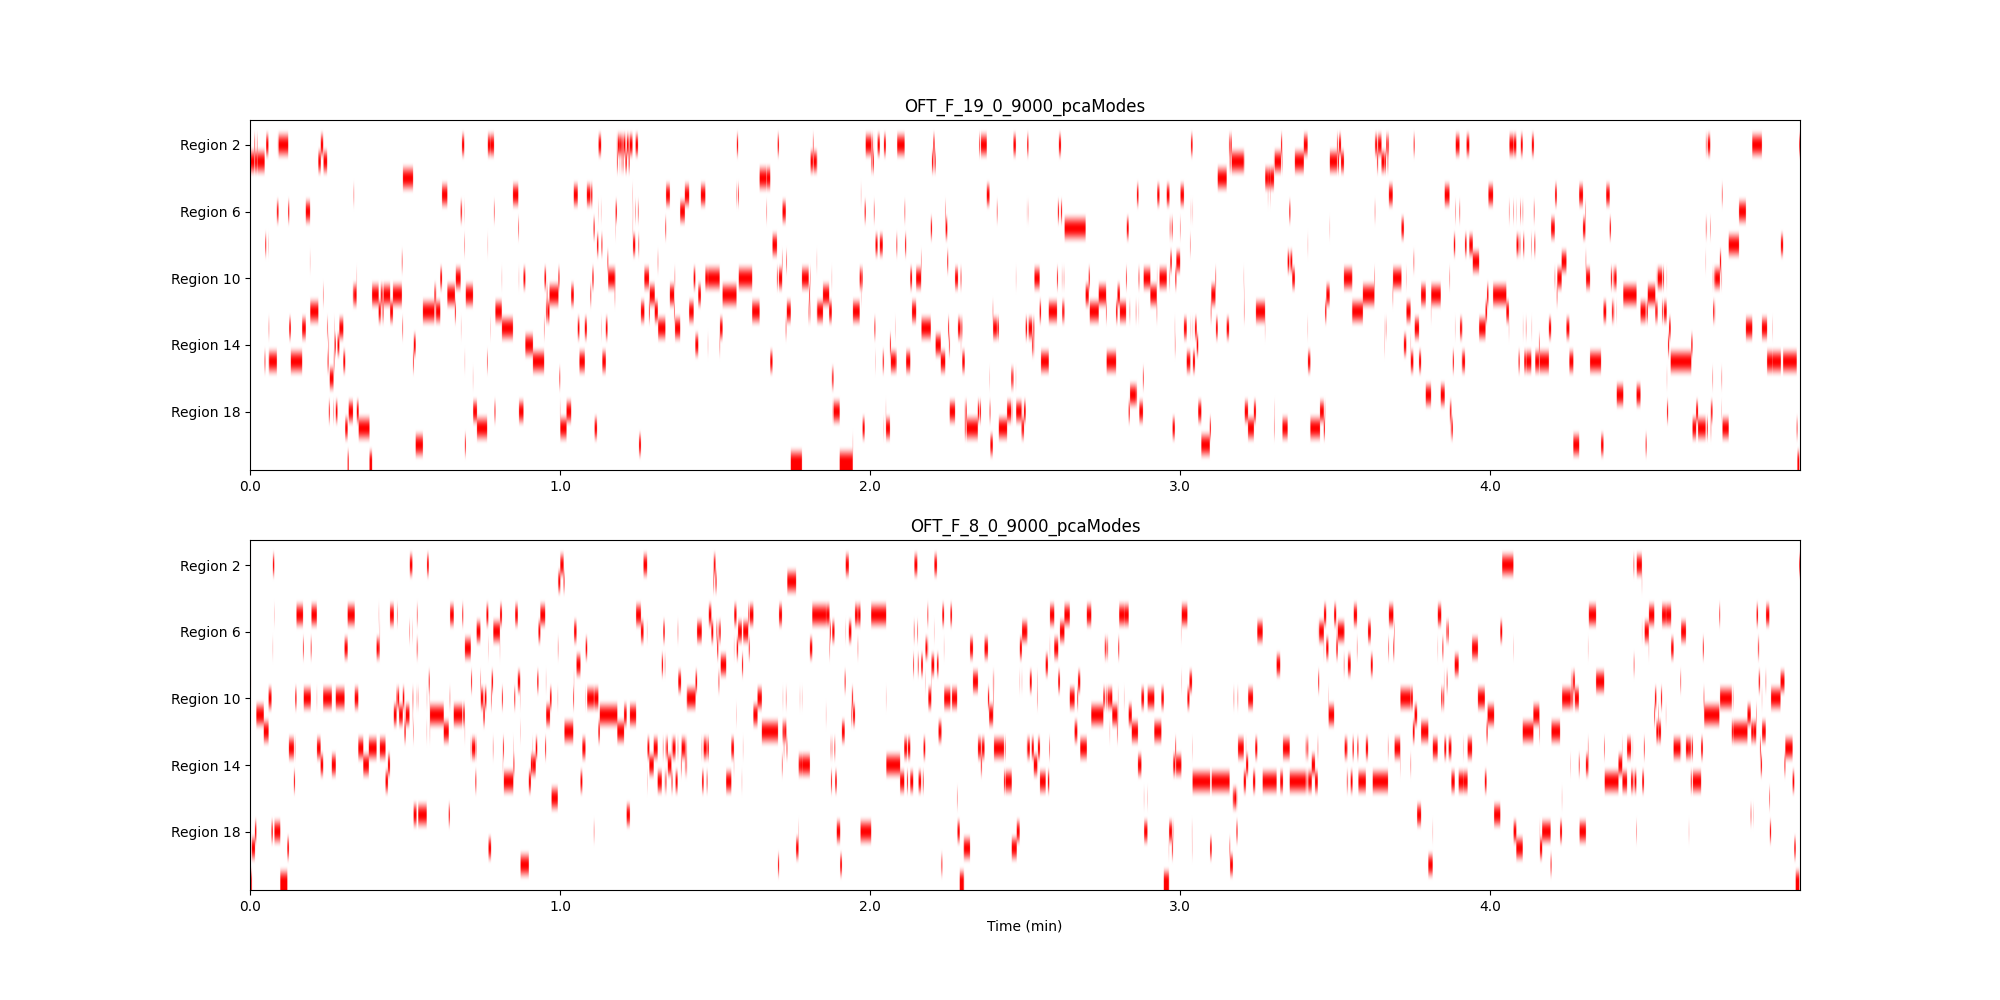

In [34]:
wregs = wshedfile['watershedRegions'].flatten()
ethogram = np.zeros((wregs.max()+1, len(wregs)))

for wreg in range(1, wregs.max()+1):
  ethogram[wreg, np.where(wregs==wreg)[0]] = 1.0


ethogram = np.split(ethogram.T, np.cumsum(wshedfile['zValLens'][0].flatten())[:-1])

fig, axes = plt.subplots(2, 1, figsize=(20,10))

for e, name, ax in zip(ethogram, wshedfile['zValNames'][0], axes.flatten()):
  print(e.shape)
  ax.imshow(e.T, aspect='auto', cmap=mmpy.gencmap())
  ax.set_title(name[0][0])
  ax.set_yticks([i for i in range(1, wregs.max()+1, 4)])
  ax.set_yticklabels(['Region %i'%(j+1) for j in range(1, wregs.max()+1, 4)])

  xticklocs = [1800*i for i in range(5)]
  ax.set_xticks(xticklocs)
  ax.set_xticklabels([j/(1800) for j in xticklocs])

ax.set_xlabel('Time (min)')

## Map Visualization

Run the below code to see the behavioral map in action.

This may take **2 minutes** to run.

In [35]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))

try:
    tqdm._instances.clear()
except:
    pass

fig, axes = plt.subplots(1, 2, figsize=(10,5))
zValues = wshedfile['zValues']
m = np.abs(zValues).max()


sigma=1.0
_, xx, density = mmpy.findPointDensity(zValues, sigma, 511, [-m-10, m+10])
axes[0].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')
axes[0].axis('off')
axes[0].set_title('Method : %s'%parameters.method)
sc = axes[0].scatter([],[],marker='o', color='k', s=500)

h5ind = 0
tstart = 2000
connections = [[0, 2, 5, 11, 13, 14, 15 ,16], [0, 1, 4, 7, 10, 13], [0, 3, 6, 9, 12, 13], [1, 2, 3], [4, 5, 6], [7, 8, 9],
                [10, 11, 12]]

h5ind_wshed = np.argwhere(np.array([d[0][0].split('_pcaModes')[0] for d in wshedfile['zValNames'][0]])==datasetnames[h5ind])[0][0]
def animate(t):
    t = int(t*clips[h5ind].fps)+tstart
    axes[1].clear()
    im = axes[1].imshow(clips[h5ind].get_frame(t/clips[h5ind].fps), cmap='Greys', origin='lower')
    for conn in connections:
        axes[1].plot(h5s[h5ind][t, conn, 0], h5s[h5ind][t, conn, 1], 'r-')
    axes[1].axis('off')
    sc.set_offsets(zValues[9000*h5ind_wshed+t])
    return mplfig_to_npimage(fig) #im, ax


anim = VideoClip(animate, duration=20) # will throw memory error for more than 100.
plt.close()
anim.ipython_display(fps=15, loop=True, autoplay=True, maxduration=120)

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

## Create region videos



Now we'll try to create region videos - we'll pick contiguous time points that belong in one watershed region, and see what the animals is doing at those times by creating a movie.  

In [36]:
# This creates region videos for all the region.
wmax = wshedfile['watershedRegions'].max()

# Making region videos. This can take a few minutes depending on how many watershed regions there are. Takes ~1min per region.

for i in range(wmax):
  if os.path.exists(parameters.projectPath + '/%s/RegionVids%i/regions_%.3i.mp4' % (parameters.method, wmax, i+1)):
    continue
  demoutils.makeregionvideo_mice(i, parameters, h5s, clips, datasetnames, minLength=10, maxLength=200, subs=3)

Loading .mat file with groups.
OFT_F_19_0_9000 OFT_F_19_0_9000
the above pairs should match
OFT_F_8_0_9000 OFT_F_8_0_9000
the above pairs should match
OFT_F_5_0_9000 OFT_F_5_0_9000
the above pairs should match
Making video at /content/Mice_mmpy/UMAP/RegionVids20/regions_001.mp4.
1  starting
Reading maximum 64 frames from 9 videos
[(np.int64(1), 64), (np.int64(2), 55), (np.int64(0), 55), (np.int64(0), 55), (np.int64(2), 47), (np.int64(0), 42), (np.int64(0), 33), (np.int64(2), 32), (np.int64(0), 31)]


9it [00:01,  4.68it/s]


AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

## Behavior annotation

Once the region videos are finished running, look through them using this cell below.

Output()

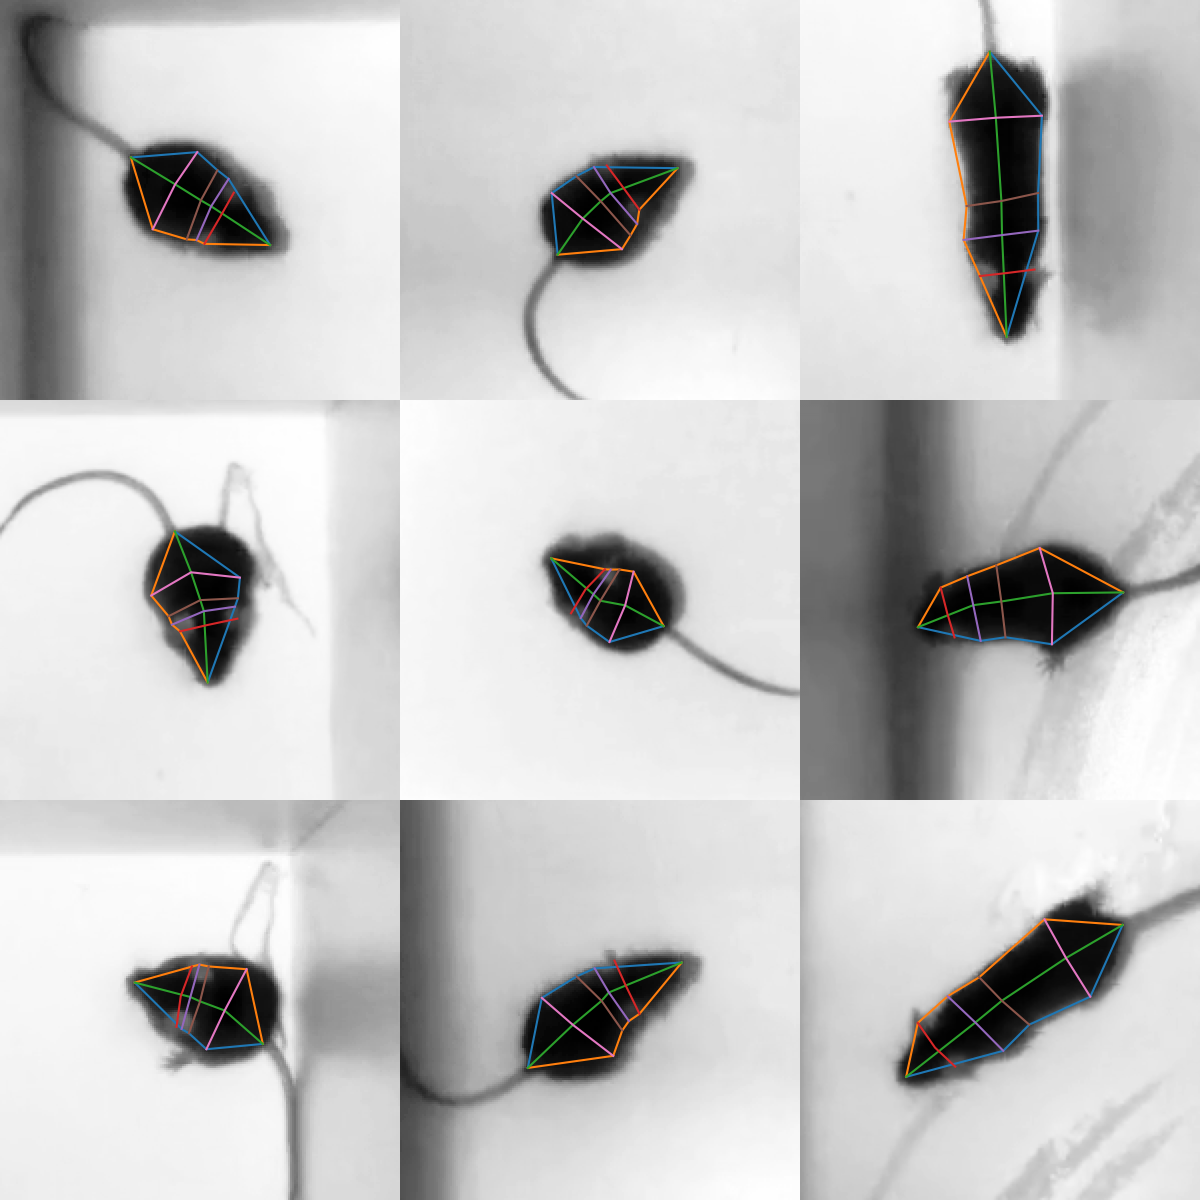

In [37]:
from IPython.display import HTML
from base64 import b64encode


outputdir = '%s/%s/RegionVids%i/'%(parameters.projectPath, parameters.method, wshedfile['watershedRegions'].max())
wmax = wshedfile['watershedRegions'].max()


def makeframe(Region):
    mp4path = outputdir + 'regions_' + '%.3i' % (Region) + '.mp4'

    if os.path.exists(mp4path):
        mp4 = open(mp4path,'rb').read()

        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
        display(HTML("""
        <video width=400 controls loop autoplay>
            <source src="%s" type="video/mp4">
        </video>
        """ % data_url))
    else:
        print('No video found!')

isldr = ipywidgets.IntSlider
sliders = {'Region':isldr(value=1, min=1, max=wshedfile['watershedRegions'].max(), layout=ipywidgets.Layout(width='600px')),}


i = ipywidgets.interactive_output(makeframe, sliders)

b = ipywidgets.HBox([sliders['Region']])

display(b, i)

plt.show()

As you scroll through region videos above,fill in the behavior dictionary below. Feel free to modify the keys as you like.

(611, 611)


(np.float64(-0.5), np.float64(610.5), np.float64(-0.5), np.float64(610.5))

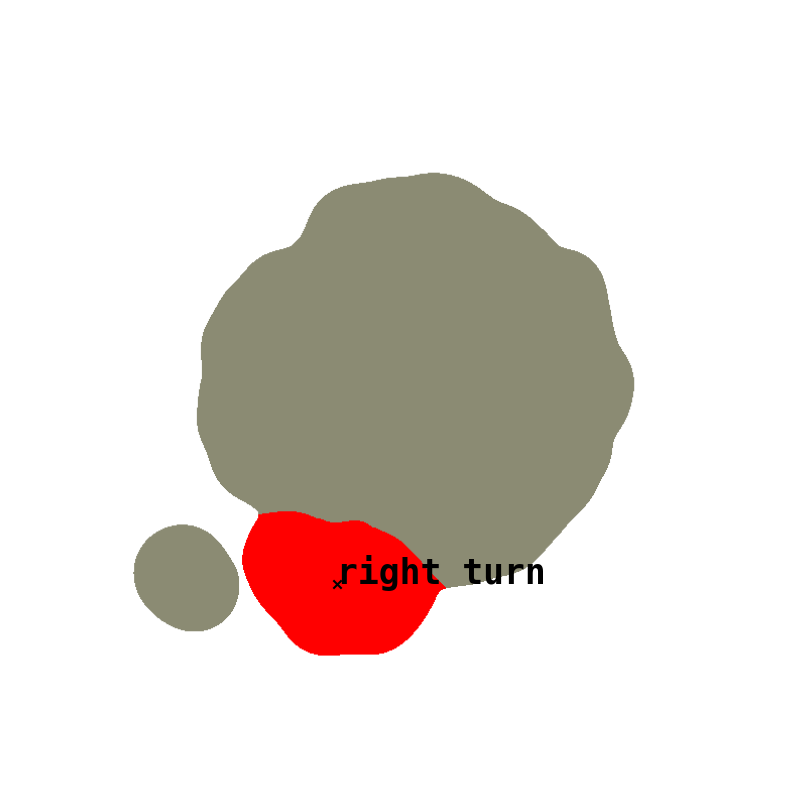

In [38]:
behavior_dict = {'right turn':[1,2], }
                #  'locomotion': [],
                #  'left turn' : [],
                #  'grooming' : [],
                #  'rearing' : [],
                #  }

def convert_LL_behlist(LL, bdict):
    LL2 = np.zeros_like(LL, dtype='int')
    LL2[LL>0] = 1
    print(LL2.shape)
    blist = np.empty((np.max(LL), 2), dtype=object)
    blist[:,1] = ''
    for k,v in bdict.items():
        blist[np.array(v)-1,1] = k
    blist[:,0] = np.arange(len(blist))+1
    behs = np.array(np.setdiff1d(np.unique(blist[:,1]), ''))
    for i in blist:
        if not i[1]:
            continue
        LL2[LL==i[0]] = np.where(behs==i[1])[0][0]+2
    return LL2, blist


fig, ax = plt.subplots(figsize=(8,8))

LL2, blist = convert_LL_behlist(wshedfile['LL'], behavior_dict)
ax.imshow(LL2, origin='lower', cmap=mmpy.gencmap())
ax.axis('off')

fs = 25

for bi,beh in enumerate(np.array(np.setdiff1d(np.unique(blist[:,1]), ''))):
    x,y = np.where(LL2==bi+2)

    ax.scatter(y.mean(), x.mean(), c='k', marker='x')
    ax.text(y.mean(),x.mean(),beh, fontdict={'fontname':'monospace', 'fontsize':fs,
                                             'fontweight':'bold'})

ax.axis('off')

At this point, you know everything you need to know to create a behavioral map for a set of datasets and be able to actually start doing some science!




You can also zip your project folder by calling
```!zip -r Mice_mmpy.zip Mice_mmpy```
and download the folder on your local computer to play around with it.

In [43]:
!zip -r Mice_mmpy.zip Mice_mmpy

  adding: Mice_mmpy/ (stored 0%)
  adding: Mice_mmpy/TSNE_Projections/ (stored 0%)
  adding: Mice_mmpy/Projections/ (stored 0%)
  adding: Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes_trainingtSNE.png (deflated 4%)
  adding: Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes_uVals_outputStatistics.pkl (deflated 21%)
  adding: Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes_trainingtSNE.png (deflated 2%)
  adding: Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes.mat (deflated 2%)
  adding: Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes_uVals.mat (deflated 14%)
  adding: Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes_uVals.mat (deflated 14%)
  adding: Mice_mmpy/Projections/OFT_F_19_0_9000_pcaModes_uVals_outputStatistics.pkl (deflated 21%)
  adding: Mice_mmpy/Projections/OFT_F_5_0_9000_pcaModes_trainingtSNE.png (deflated 3%)
  adding: Mice_mmpy/Projections/OFT_F_5_0_9000_pcaModes_uVals.mat (deflated 14%)
  adding: Mice_mmpy/Projections/OFT_F_8_0_9000_pcaModes.mat (deflated 2%)
  adding: Mice_mmpy/

# 10.&nbsp; Transitions Analysis

We'll use the watershed region assignments for analyses in this section. Lets load them up.

In [39]:
wregsall = wshedfile['watershedRegions'][0]
print(wregsall.shape)

(27000,)


In [40]:
wregssplit = np.split(wregsall, np.cumsum(wshedfile['zValLens'][0])[:-1])
print([w.shape for w in wregssplit])
print([d[0][0] for d in wshedfile['zValNames'][0]])

[(9000,), (9000,), (9000,)]
[np.str_('OFT_F_19_0_9000_pcaModes'), np.str_('OFT_F_8_0_9000_pcaModes'), np.str_('OFT_F_5_0_9000_pcaModes')]


## Transition Matrix

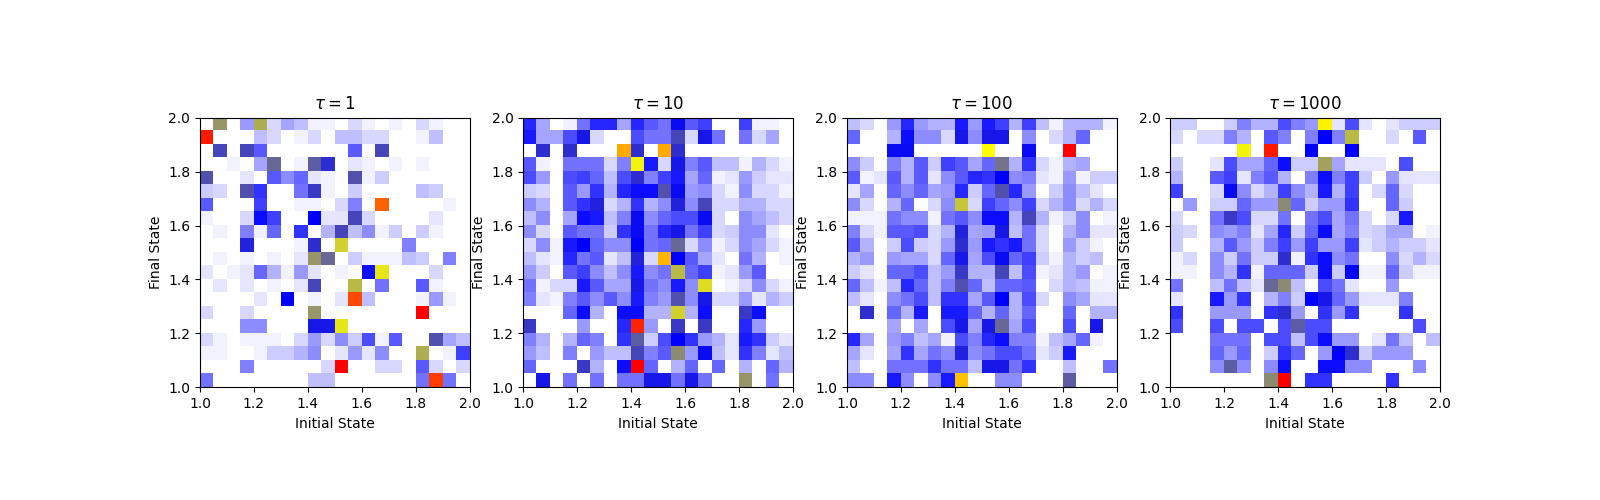

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(16,5))

transitions = demoutils.getTransitions(wregsall)
statevals = np.unique(transitions).tolist()
statevals = statevals + [statevals[-1]+1]
for ax, d in zip(axes.flatten(), [1, 10, 100, 1000]):
    F = demoutils.makeTransitionMatrix(transitions, d)
    ax.imshow(F, cmap=mmpy.gencmap(), extent=(statevals[0], statevals[1], statevals[0], statevals[1]))
    ax.set_xlabel('Initial State')
    ax.set_ylabel('Final State')
    ax.set_title(r'$\tau = $%i'%d)

## Eigenvalues of Transition matrix at different delays

  ax.set_xlim([0, 2e3])

  ax.set_xlim([0, 2e3])



Calculating Eigenvalues
Calculating Markov Eignevalues
0
1
2
Generating Plot


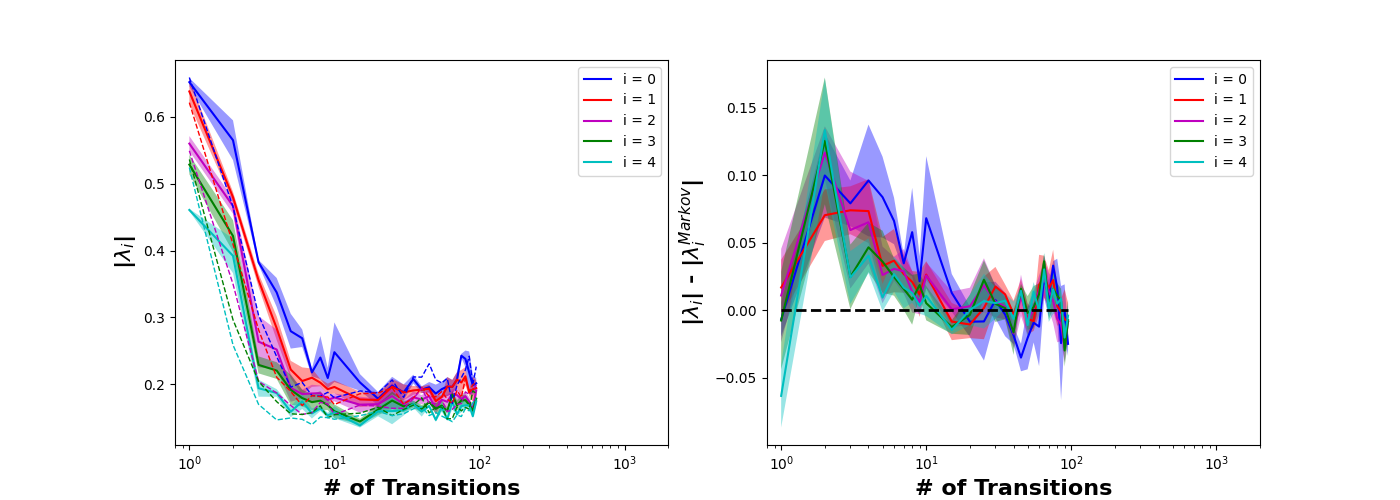

In [42]:
fix, ax, eigs = demoutils.plotLaggedEigenvalues([demoutils.getTransitions(w) for w in wregssplit],
                                                lags = np.arange(1, 11).tolist() + np.arange(15, 100, step=5).tolist())

# END OF NOTEBOOK


## WORK IN PROGRESS

- Show transitions on map.

In [ ]:
!git clone https://github.com/NaysanSaran/markov-chain
!cp markov-chain/src/markovchain.py .
!cp markov-chain/src/node.py .


In [ ]:
%load_ext autoreload
%autoreload 2
import markovchain

In [ ]:
T = demoutils.makeTransitionMatrix(transitions, 1)

P = np.array(T) # Transition matrix
mc = markovchain.MarkovChain(P, wshedfile['LL'])
mc.draw()

In [ ]:
mc.nodes[0].label

In [ ]:

fig, ax = plt.subplots(figsize=(8,8))

# Set the axis limits
ax.set_xlim(mc.xlim)
ax.set_ylim(mc.ylim)

# Draw the nodes
for node in mc.nodes:
    node.add_circle(ax)

# Add the transitions
for i in range(mc.M.shape[0]):
    for j in range(mc.M.shape[1]):
        # self loops
        if i == j:
            # Loop direction
            if mc.nodes[i].y >= 0:
                mc.nodes[i].add_self_loop(ax, prob = mc.M[i,j], direction='up')
            else:
                mc.nodes[i].add_self_loop(ax, prob = mc.M[i,j], direction='down')
        # directed arrows
        elif mc.M[i,j] > 0:
            mc.add_arrow(ax, mc.nodes[i], mc.nodes[j], prob = mc.M[i,j])




In [ ]:
fig, ax = plt.subplots

In [ ]:
LL = wshedfile['LL']
i = 10
%matplotlib widget
fig, ax = plt.subplots()
y,x = np.where(LL==i)
y,x = y.mean(), x.mean()
ax.imshow(LL, origin='lower')
ax.scatter(x, y,color='white')
